<a href="https://colab.research.google.com/github/JeninJP/House_price_prediction/blob/main/model%20building/Real_Estate_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Real Estate price Predicition**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
#Loading the data
df= pd.read_csv('/content/drive/MyDrive/csv_files/bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### Data Cleaning

In [ ]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
df.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [ ]:
df.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [ ]:
df1=df.drop(['society','availability'],axis=1)
df1

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [ ]:
df1.head(50)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Super built-up Area,Whitefield,2 BHK,1170,2.0,1.0,38.00
6,Super built-up Area,Old Airport Road,4 BHK,2732,4.0,NaN,204.00
7,Super built-up Area,Rajaji Nagar,4 BHK,3300,4.0,NaN,600.00
8,Super built-up Area,Marathahalli,3 BHK,1310,3.0,1.0,63.25
9,Plot Area,Gandhi Bazar,6 Bedroom,1020,6.0,NaN,370.00


In [ ]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

As the no of the null is very less compared to total no of rows. We can drop these values.

In [ ]:
df2=df1.dropna()
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [ ]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [ ]:
#Creating a new column for BHK
for i, data in df2.iterrows():
  d=data["size"].split(" ")
  df2.at[i,"BHK"]=int(d[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df2['BHK']=df2['BHK'].astype(int)
#Droping the size feature
df2.drop(['size'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df2.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [ ]:
df2['BHK'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [ ]:
df2[df2['BHK']>=20]

,area_type,location,total_sqft,bath,balcony,price,BHK
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,2400,40.0,0.0,660.0,43


In [ ]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Some values of the total_sqft column are in a range format so we are taking the avg for the same.

In [ ]:
def isfloat(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
df2[~df2['total_sqft'].apply(isfloat)]

,area_type,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [ ]:
df3=df2.copy()

In [ ]:
def convert_sqft_to_num(x):
  token= x.split("-")
  if len(token)==2:
    return (float(token[0]) + float(token[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)
df3

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


### Feature Engineering

In [ ]:
d=df3['location'].value_counts()
print(len(d))
d

1265


Whitefield            514
Sarjapur  Road        372
Electronic City       300
Kanakpura Road        261
Thanisandra           231
                     ... 
Milk Colony             1
Sundara Nagar           1
Jaladarsini Layout      1
Madanayakahalli         1
Abshot Layout           1
Name: location, Length: 1265, dtype: int64

As there are 1265 different location so this would make the model very complex to train. So we are going reduce the no of location by considering the no of  properties in the location(*if less than 10 considering it as other*)

In [ ]:
df3.location = df3.location.apply(lambda x: x.strip())
print(len(d))
d_less_than_10=d[d<=10]
d_less_than_10

1265


Kalkere               10
Gunjur Palya          10
Naganathapura         10
HAL 2nd Stage         10
Ganga Nagar           10
                      ..
Milk Colony            1
Sundara Nagar          1
Jaladarsini Layout     1
Madanayakahalli        1
Abshot Layout          1
Name: location, Length: 1028, dtype: int64

In [ ]:
df4=df3.copy()
df4.location = df4.location.apply(lambda x :'other' if x in d_less_than_10 else x )
len(df4.location.unique())

267

In [ ]:
df4[df4['location']=='other']

,area_type,location,total_sqft,bath,balcony,price,BHK
18,Super built-up Area,other,2770.0,4.0,2.0,290.00,3
19,Super built-up Area,other,1100.0,2.0,2.0,48.00,2
25,Super built-up Area,other,1250.0,3.0,2.0,56.00,3
42,Super built-up Area,other,600.0,1.0,0.0,38.00,1
49,Built-up Area,other,869.0,2.0,1.0,36.00,2
...,...,...,...,...,...,...,...
13278,Built-up Area,other,1256.0,2.0,1.0,65.00,2
13285,Super built-up Area,other,1353.0,2.0,2.0,110.00,2
13291,Plot Area,other,812.0,1.0,0.0,26.00,1
13292,Super built-up Area,other,1440.0,2.0,2.0,63.93,3


In [ ]:
df4['price_per_sqft']= df4['price']*100000/df4['total_sqft']

Removing the data in which the bedroom  have less than 300 sqft area

In [ ]:
df5=df4.copy()
df5[df5.total_sqft/df5.BHK<300].head()

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,other,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268


In [ ]:
print(df5.shape)
df6=df5[~(df5.total_sqft/df5.BHK<300)]
df6.shape

(12710, 8)


(12055, 8)

In [ ]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers (df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
            
df7=remove_pps_outliers(df6)
df7. shape

(9817, 8)

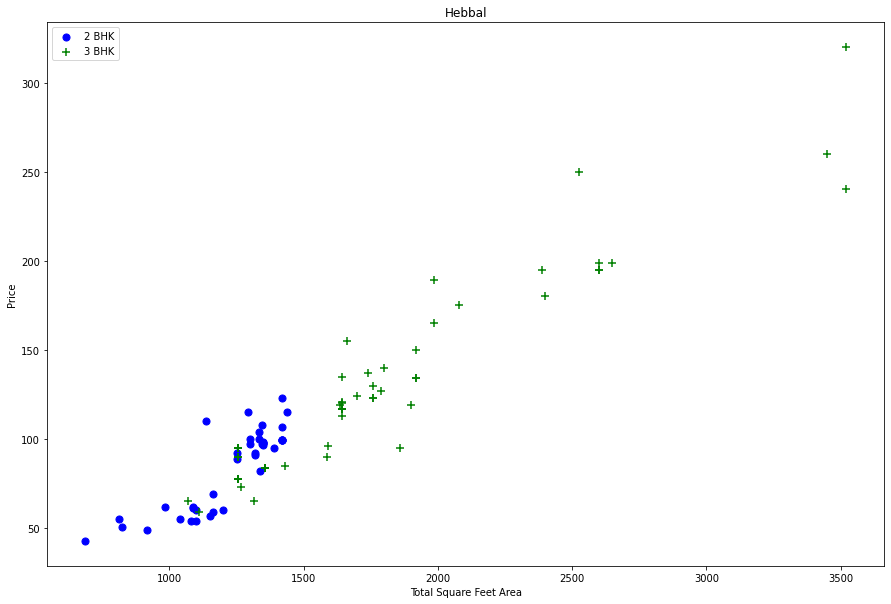

In [ ]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams ['figure.figsize']= (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3. total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7, "Hebbal")

Here we can see that for some properties even if the no of bedrooms is more still the prices are less for the same sqft area in the same location which is outlier.

In [ ]:
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('BHK'):
      bhk_stats[bhk]={
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('BHK'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape



(7007, 8)

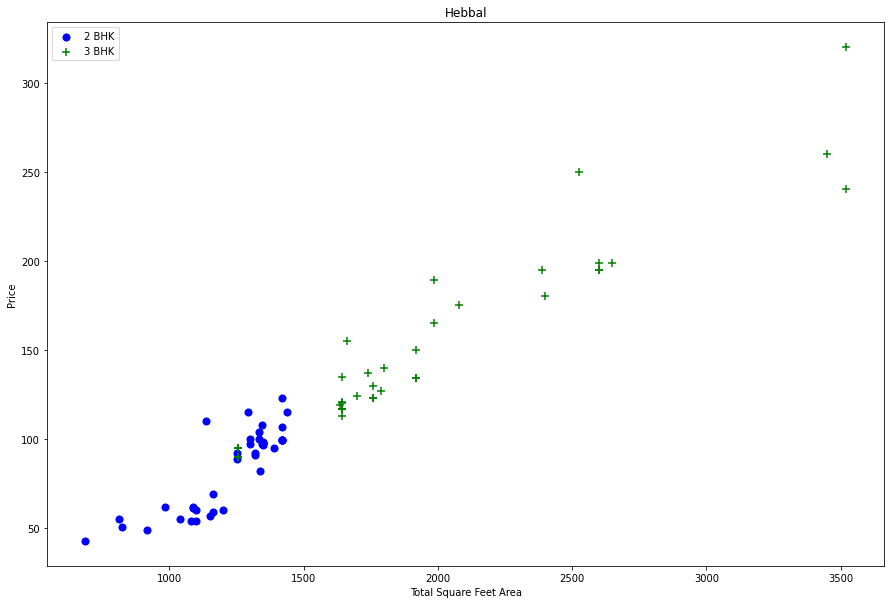

In [ ]:
plot_scatter_chart(df8, "Hebbal")

In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

In [ ]:
df8[df8.bath>8]

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
3593,Built-up Area,KR Puram,4600.0,9.0,2.0,200.0,9,4347.826087
4887,Super built-up Area,Mico Layout,5000.0,9.0,3.0,210.0,9,4200.000000
5415,Built-up Area,Raja Rajeshwari Nagar,3600.0,9.0,3.0,240.0,9,6666.666667
7738,Super built-up Area,other,5000.0,9.0,3.0,360.0,11,7200.000000
8095,Super built-up Area,other,11338.0,9.0,1.0,1000.0,6,8819.897689
9253,Super built-up Area,other,5425.0,13.0,0.0,275.0,13,5069.124424


properties having more than 2 bathrooms than the bedrooms are outliers

In [ ]:
df8[df8.bath>df8.BHK+2]

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
1542,Built-up Area,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6456,Super built-up Area,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8095,Super built-up Area,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [ ]:
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(6940, 8)

In [ ]:
df9=df9.drop(['price_per_sqft'],axis=1)
df9.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [ ]:
dummies=pd.get_dummies(df9['location'])
dummies['other']
dummies1=pd.get_dummies(df9['area_type'])
dummies1['Super built-up  Area']

0       1
1       1
2       1
3       0
4       1
       ..
9808    0
9809    1
9812    1
9813    0
9816    0
Name: Super built-up  Area, Length: 6940, dtype: uint8

In [ ]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,south
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df10=pd.concat([df9,dummies.drop('other',axis='columns'),dummies1.drop('Super built-up  Area',axis='columns')],axis='columns')
df10

,area_type,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south,Built-up Area,Carpet Area,Plot Area
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,Carpet Area,other,1200.0,2.0,3.0,70.0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9809,Super built-up Area,other,1800.0,1.0,1.0,200.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9812,Super built-up Area,other,1353.0,2.0,2.0,110.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9813,Plot Area,other,812.0,1.0,0.0,26.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df11= df10.drop(['location','area_type','balcony'],axis='columns')
df11

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,south,Built-up Area,Carpet Area,Plot Area
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9809,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9812,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9813,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X= df11.drop('price',axis='columns')
X
y=df11.price


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(X_train,y_train)
print(lr_clf.score(X_train,y_train))
lr_clf.score(X_test,y_test)

0.8413296434162656


0.8693381712023368

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=5)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86933817, 0.77011839, 0.84536844, 0.78924535, 0.87659164])

In [ ]:
predicted=lr_clf.predict(X_test)
predicted

array([ 42.5122701 ,  63.58038311, 102.1633523 , ...,  53.96081295,
        88.31621516, 118.07425306])

In [ ]:
#Import metrics library
from sklearn import metrics
#Print result of MAE
print (metrics.mean_absolute_error(y_test, predicted))
#Print result of MSE
print (metrics.mean_squared_error (y_test, predicted))
#Print result of RMSE
print (np.sqrt(metrics.mean_squared_error(y_test, predicted)))

16.420940747029054
755.7355130189088
27.49064409974617


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=5)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.830132,{'normalize': False}
1,lasso,0.659907,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.730124,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:

np.where(X.columns=='south')[0][0]

250

In [ ]:
def pred_price(loc,sqft,bath,bhk,area_type):
  loc_index=np.where(X.columns==loc)[0][0]
  area_index=np.where(X.columns==area_type)[0][0]

  x=np.zeros(len(X.columns))
  x[0]= sqft
  x[1]= bath
  x[2]=bhk
  if loc_index >=0:
    x[loc_index]=1
  if area_index >=0:
    x[area_index]=1
  return lr_clf.predict([x])[0]


In [ ]:
pred_price('1st Phase JP Nagar',1000, 2, 2,'Built-up  Area')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


83.18913585540865

In [ ]:
pred_price('1st Phase JP Nagar',1000, 2, 3,'Built-up  Area')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


82.26543243595826

In [ ]:
pred_price('Whitefield',1000, 2, 2,'Carpet  Area')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


56.191217483204696

In [ ]:
pred_price('Whitefield',1000, 2, 3,'Carpet  Area')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


55.267514063754305

### **Export the tested model to a pickle file**

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))